## Assignment 1

Bus delays

Download and prepare of the data

In [74]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

#df = pd.read_csv(r"D:\program\AH2179\Lab1\Dataset\Exercise2BikeSharing.csv")

df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1) # Drop unnecessary columns

#corr_matrix = df.corr()
#corr_matrix['Arrival_delay'].sort_values(ascending=False)

#drop arrival delay column
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

# df = pd.read_csv('Exercise2BusData.csv')
# df.head(10)

separate train and test set

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3407)

create the model

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = xgb.XGBRegressor(random_state=3407, n_jobs=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Normalization

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Grid search

In [78]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.5],
}

cv = KFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=cv, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Best Score: 0.9916231393814087
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Best Score: 0.9916231393814087


train the model

In [79]:
best_xgb = xgb.XGBRegressor(n_jobs=1, **best_params)

best_xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


predictions

In [80]:
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.932384490966797
Mean Squared Error: 229.06927490234375
R-squared: 0.9932504296302795


plot the results

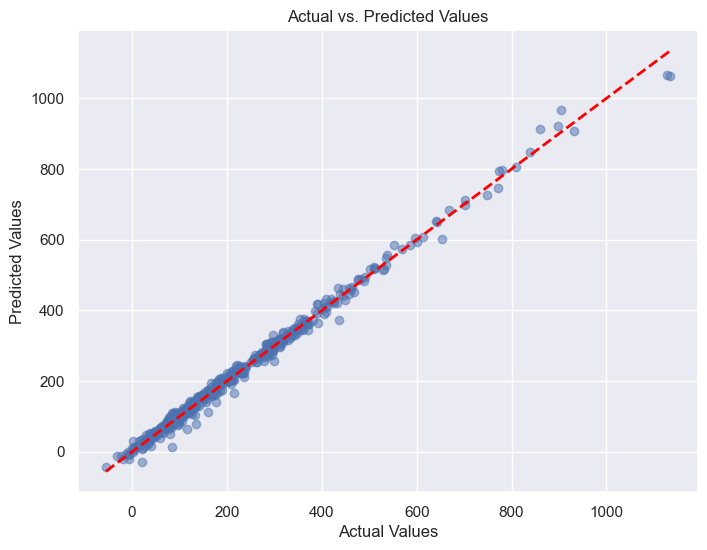

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## Part 2
Bike sharing demand

In [90]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

df = df.drop(['dteday','instant'], axis=1)

x = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df['cnt']

separate train and test set

In [85]:
from sklearn.model_selection import train_test_split

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size=0.2, random_state=3407)

Normalization

In [86]:
from sklearn.preprocessing import StandardScaler

scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

create the model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

base_bike = xgb.XGBRegressor(random_state=3407, n_jobs=1)

param_grid_b = {
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

cv_b = KFold(n_splits=5, shuffle=True)

grid_b = GridSearchCV(
    estimator=base_bike,
    param_grid=param_grid_b,
    cv=cv_b,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_b.fit(X_train_b_scaled, y_train_b)
best_params_b = grid_b.best_params_

print('Best Parameters (bike):', best_params_b)
print('Best Score (bike):', grid_b.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (bike): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Best Score (bike): -1586.3978271484375


In [88]:
best_bike = xgb.XGBRegressor(random_state=3407, n_jobs=1, **best_params_b)

best_bike.fit(X_train_b_scaled, y_train_b)

bike_pred = best_bike.predict(X_test_b_scaled)

bike_mae = mean_absolute_error(y_test_b, bike_pred)
bike_mse = mean_squared_error(y_test_b, bike_pred)
bike_r2 = r2_score(y_test_b, bike_pred)
print(f'Bike MAE: {bike_mae}')
print(f'Bike MSE: {bike_mse}')
print(f'Bike R2: {bike_r2}')

Bike MAE: 24.02928352355957
Bike MSE: 1431.537353515625
Bike R2: 0.9558126926422119


plotting results

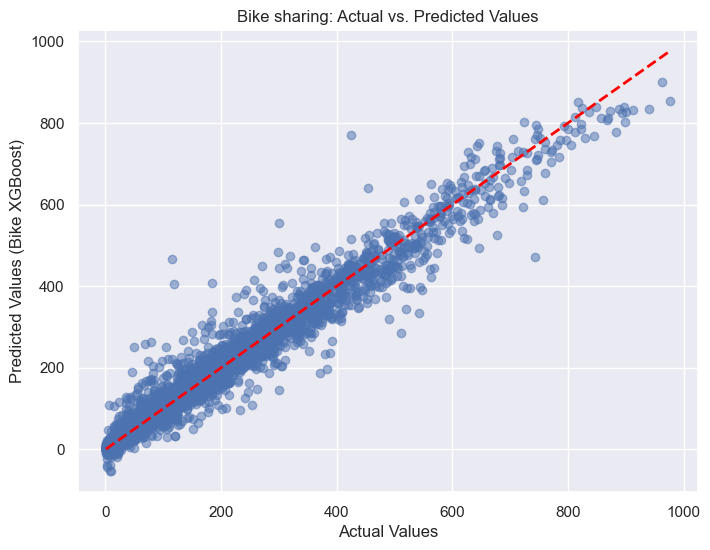

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test_b, bike_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Bike XGBoost)')
plt.title('Bike sharing: Actual vs. Predicted Values')
plt.plot([min(y_test_b), max(y_test_b)], [min(y_test_b), max(y_test_b)], linestyle='--', color='red', lw=2)
plt.show()